In [1]:
import numpy as np
from scipy.optimize import fmin
from scipy.interpolate import RectBivariateSpline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 18

In [2]:
h = 0.1
x = np.arange(-6, 6+h, h)
y = np.arange(-6, 6+h, h)

X, Y = np.meshgrid(x, y)
F0 = 1.5 - np.exp(-0.03 * (3 * X**2 + Y**2))
F = 1.5 - 1.6 * np.exp(-0.05 * (3 * X**2 + (Y + 3)**2))
F2 = F + 0.5 - np.exp(-0.1 * (3 * (X - 3)**2 + (Y - 3)**2))

dF0y, dF0x = np.gradient(F0, h) 
dF2y, dF2x = np.gradient(F2, h) 

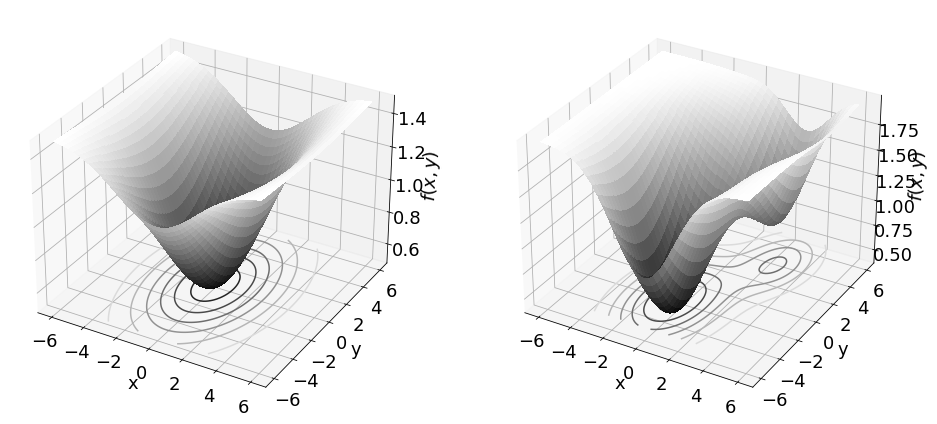

In [3]:
# Figure 4.3
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(16, 8))

axs[0].plot_surface(X, Y, F0, cmap='gray', linewidth=0, antialiased=False)
axs[0].contour(X, Y, F0, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_zlabel(r'$f(x, y)$')

axs[1].plot_surface(X, Y, F2, cmap='gray', linewidth=0, antialiased=False)
axs[1].contour(X, Y, F2, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_zlabel(r'$f(x, y)$');

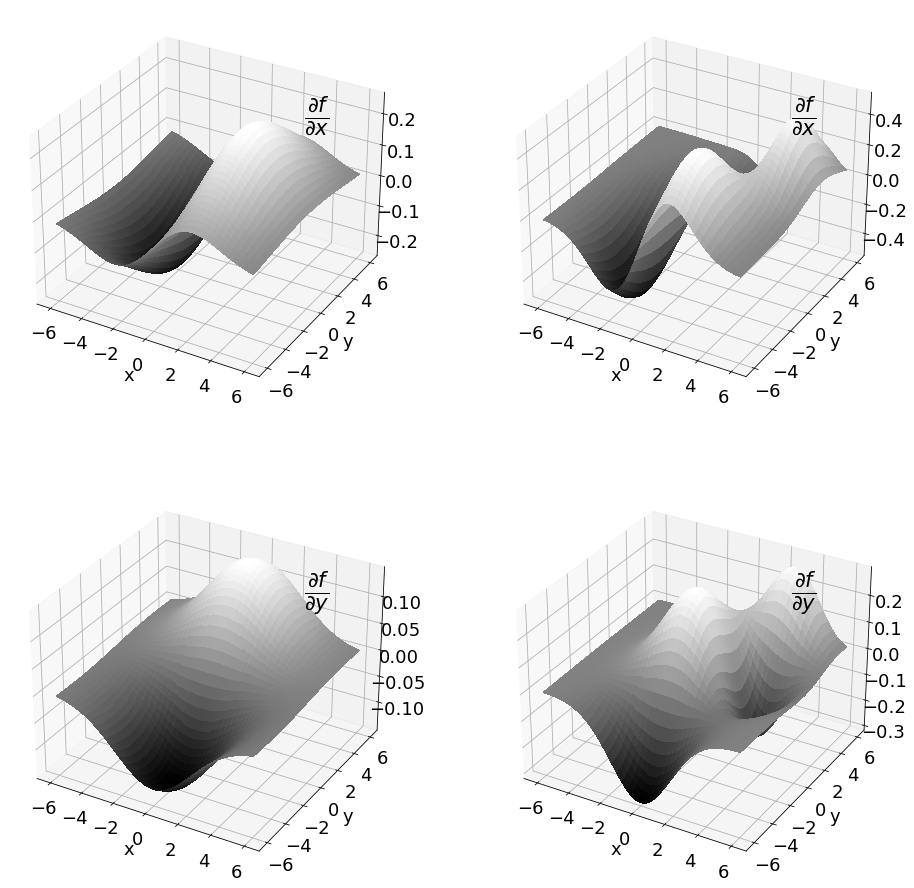

In [4]:
# Figure 4.5
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(16, 16))
derivs = [dF0x, dF2x, dF0y, dF2y]
labels = [
    r'$\frac{\partial{f}}{\partial{x}}$',
    r'$\frac{\partial{f}}{\partial{x}}$',
    r'$\frac{\partial{f}}{\partial{y}}$',
    r'$\frac{\partial{f}}{\partial{y}}$'
]
for ax, deriv, label in zip(axs.flat, derivs, labels):
    ax.plot_surface(
        X, Y, deriv, cmap='gray',
        linewidth=0, antialiased=False
    )
    ax.text2D(0.75, 0.7, label, transform=ax.transAxes, fontsize=30)
    ax.set_ylabel('y')
    ax.set_xlabel('x')

In [5]:
## Gradient Descent
x = np.zeros(10)
y = np.zeros(10)
f = np.zeros(10)

Fquad = X**2 + 3*Y**2

# Initial guess
x[0], y[0] = 3, 2

# Initial function value
f[0] = x[0]**2 + 3*y[0]**2 

for j in range(len(x) - 1):
    delta = (x[j]**2 + 9*y[j]**2) / (2*x[j]**2 + 54*y[j]**2)
    # update values
    x[j+1] = (1 - 2*delta) * x[j]
    y[j+1] = (1 - 6*delta) * y[j]
    f[j+1] = x[j+1]**2 + 3 * y[j+1]**2
    
    # check convergence
    if abs(f[j+1] - f[j]) < 1e-6:
        x = x[:j+2]
        y = y[:j+2]
        f = f[:j+2]
        break

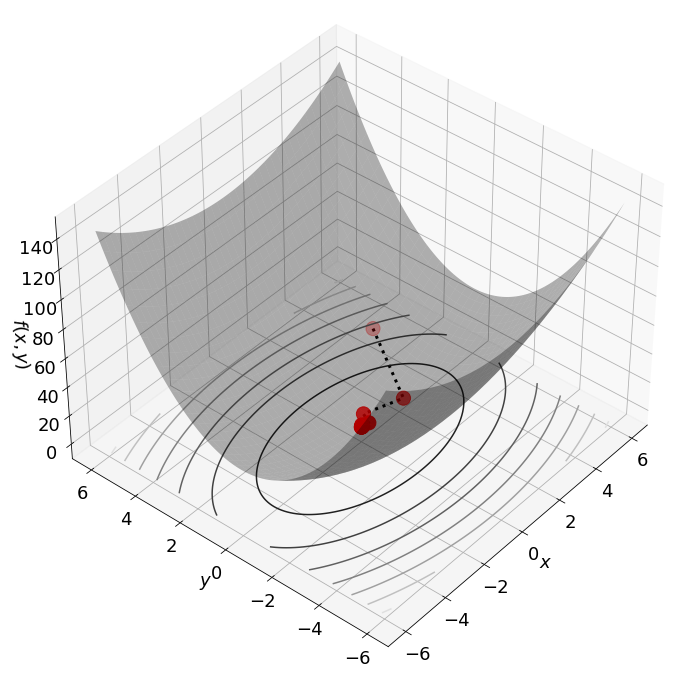

In [6]:
# Figure 4.4

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(12, 12))
ax.plot_surface(X, Y, Fquad, linewidth=0, color='black', alpha=0.3)
ax.scatter(x, y, f, 'o', color='red', s=200)
ax.plot(x, y, f, ':', color='black', linewidth=3)
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$');

In [7]:
## Gradient descent

def plot_optimization(X, Y, F, ps, fs, colors, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    axs = [
        fig.add_subplot(1, 2, 1, projection='3d'),
        fig.add_subplot(1, 2, 2)
    ]
    axs[0].plot_surface(X, Y, F-0.2, cmap='binary', alpha=0.5)
    for p, f, c in zip(ps, fs, colors):
        axs[0].plot(*p, f, 'o', color=c)
        axs[0].plot(*p, f, ':', color='black')
    axs[0].set_xlabel('$y$') # [sic]
    axs[0].set_ylabel('$x$')
    axs[0].set_title('$f(x,y)$')
    axs[0].view_init(elev=40, azim=-100)

    axs[1].contour(X, Y, F-1, 10, cmap='binary')
    for p, f, c in zip(ps, fs, colors):
        axs[1].plot(*p, 'o', color=c)
        axs[1].plot(*p, ':', color='black')
    axs[1].set_xlabel('y') # [sic]
    axs[1].set_ylabel('x')
    
    plt.tight_layout()

In [8]:
# Objective Function and gradients defined on grid

h = 0.1
x = np.arange(-6, 6+h, h)
y = np.arange(-6, 6+h, h)
X, Y = np.meshgrid(x, y)

F = (
    1.5 - 1.6 * np.exp(-0.05 * (3 * (X + 3)**2 + (Y + 3)**2)) +
    0.5 - np.exp(-0.1 * (3 * (X - 3)**2 + (Y - 3)**2))
)
dFy, dFx = np.gradient(F, h, h)

# Splines for "exact" evaluaton of F, dFx, dFy
# NB reversal of x, y here and in evaluations
F_spline = RectBivariateSpline(y, x, F)
dFx_spline = RectBivariateSpline(y, x, dFx)
dFy_spline = RectBivariateSpline(y, x, dFy)

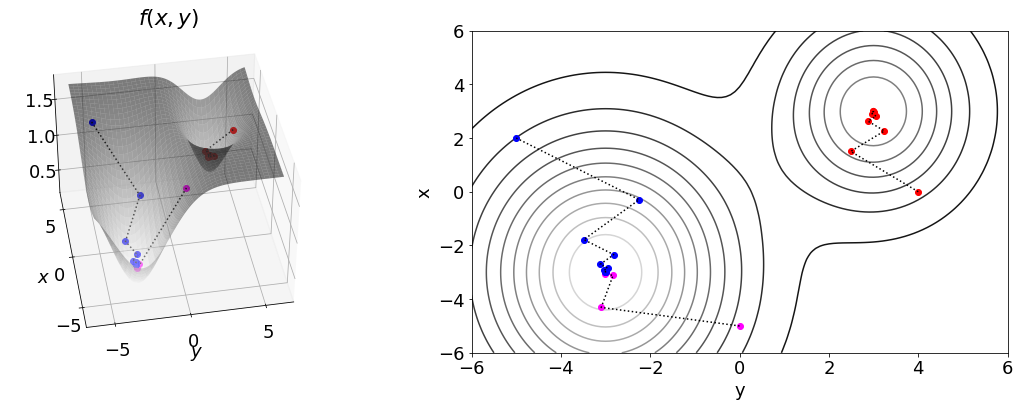

In [9]:
# Figure 4.6 Gradient Descent with fmin()

# Starting points
p0s = [
    (4, 0),
    (0, -5),
    (-5, 2)
]
# Trail
ps = []
fs = []

maxiter = 10

for p0 in p0s:
    xn = np.empty(maxiter + 1)
    yn = np.empty(maxiter + 1)
    fn = np.empty(maxiter + 1)
    
    # Starting point
    xn[0], yn[0] = p0
    fn[0] = F_spline(yn[0], xn[0])
    dfx = dFx_spline(yn[0], xn[0])
    dfy = dFy_spline(yn[0], xn[0])

    for i in range(maxiter):
        # Estimate optimum step size
        δ, *_ = fmin(
            lambda δ: float(F_spline(yn[i] - δ * dfy, xn[i] - δ * dfx)),
            x0=0.2, disp=False
        )
        # Update x, y, f and derivatives
        xn[i+1] = xn[i] - δ * dfx 
        yn[i+1] = yn[i] - δ * dfy 
        fn[i+1] = F_spline(yn[i+1], xn[i+1])
        dfx = dFx_spline(yn[i+1], xn[i+1])
        dfy = dFy_spline(yn[i+1], xn[i+1])
        
        if abs(fn[i+1] - fn[i]) < 1e-6:
            ps.append((xn[:i+2], yn[:i+2]))
            fs.append(fn[:i+2])
            break
    else:
        ps.append((xn, yn))
        fs.append(fn)

plot_optimization(X, Y, F, ps, fs, colors=['red', 'magenta', 'blue'])

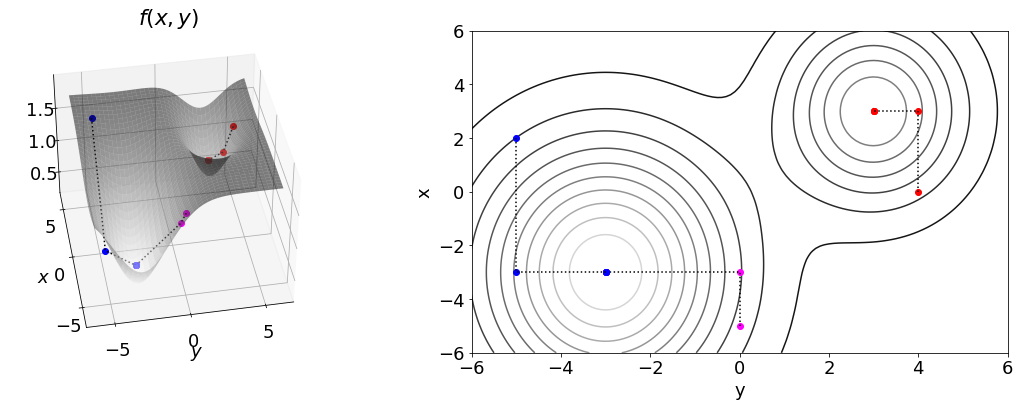

In [10]:
# Figure 4.7 Alternating Descent

# Starting points
p0s = [
    (4, 0),
    (0, -5),
    (-5, 2)
]
# Trail
ps = []
fs = []
    
for p0 in p0s:    
    xn = np.zeros(5)
    yn = np.zeros(5)
    f = np.zeros(5)
    xn[0], yn[0] = p0
    f[0] = F_spline(*p0)

    fx = F_spline(xn[0], y)
    xn[1] = xn[0]
    yn[1] = y[np.argmin(fx)]
    
    fy = F_spline(x, yn[1])
    yn[2] = yn[1]
    xn[2] = x[np.argmin(fy)]
    
    fx = F_spline(xn[2], y)
    xn[3] = xn[2]
    yn[3] = y[np.argmin(fx)]
    
    fy = F_spline(x, yn[3])
    yn[4] = yn[3]
    xn[4] = x[np.argmin(fy)]
    
    for i in range(1, 5):
        f[i] = F_spline(xn[i], yn[i])

    ps.append((xn, yn))
    fs.append(f)

plot_optimization(X, Y, F, ps, fs, colors=['red', 'magenta', 'blue'])